<a href="https://colab.research.google.com/github/swapnil-mergal/swapnil_mergal-23-27-27/blob/main/Assn3_Swapnil_Mergal_23_27_27.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a function that takes input (x,y) and returns MLE theta using Normal Equation.
Use numpy in python to implement. Create a feature set x using linspace or np.random
function and target values y. Call the function by passing these arguments and plot the
precited values against input data.

MLE Theta: [7.4169429  2.94053463]


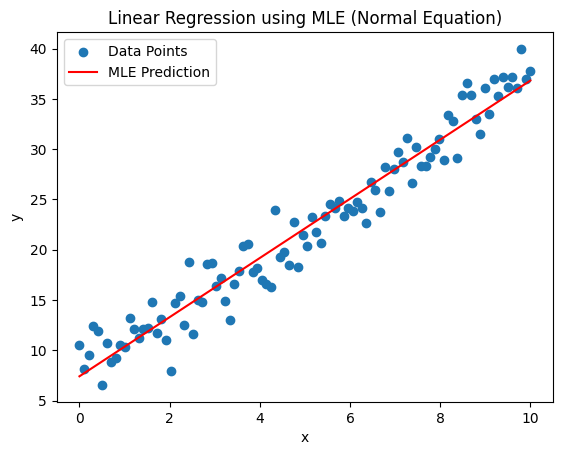

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate MLE theta using Normal Equation
def normal_equation_mle(x, y):
    # Adding a bias term (column of ones) to x for the intercept term
    X_b = np.c_[np.ones((x.shape[0], 1)), x]
    # Using the Normal Equation to calculate theta
    theta = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    return theta

# Generate feature set x and target values y
np.random.seed(0)
x = np.linspace(0, 10, 100)
y = 3 * x + 7 + np.random.randn(100) * 2  # Linear relation with some noise

# Calculate theta using the MLE function
theta_mle = normal_equation_mle(x, y)
print("MLE Theta:", theta_mle)

# Plotting predicted values against input data
X_b = np.c_[np.ones((x.shape[0], 1)), x]
y_pred = X_b.dot(theta_mle)

plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='red', label='MLE Prediction')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression using MLE (Normal Equation)")
plt.legend()
plt.show()


Write a program to implement polynomial regression and compare it with the result
obtained in the last question by plotting both the hypothesis.

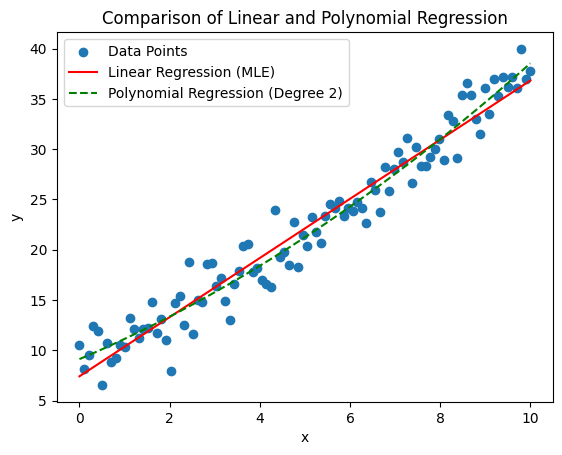

In [2]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Transform x to include polynomial features
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x.reshape(-1, 1))

# Fit polynomial regression model
poly_reg_model = LinearRegression()
poly_reg_model.fit(x_poly, y)

# Predictions using polynomial regression
y_poly_pred = poly_reg_model.predict(x_poly)

# Plotting both hypotheses
plt.scatter(x, y, label='Data Points')
plt.plot(x, y_pred, color='red', label='Linear Regression (MLE)')
plt.plot(x, y_poly_pred, color='green', linestyle='--', label='Polynomial Regression (Degree 2)')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Comparison of Linear and Polynomial Regression")
plt.legend()
plt.show()


3. Access the effects of outliers while training a linear regression by introducing some outliers in the data. Propose a solution how these outliers can be detected and removed
before training the model. Implement the solution in python.

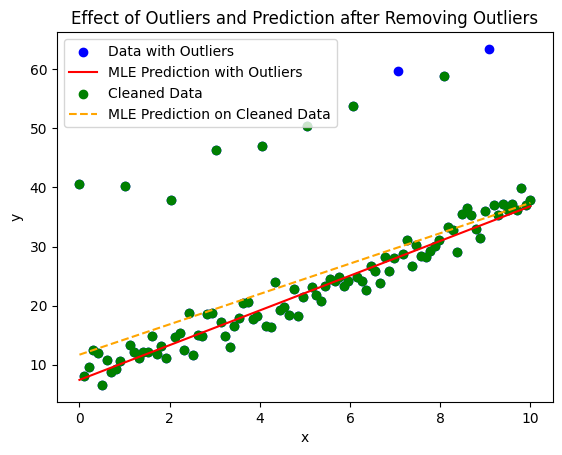

In [3]:
# Introduce outliers
y_with_outliers = y.copy()
y_with_outliers[::10] += 30  # Add large values at intervals to create outliers

# Detect and remove outliers using IQR method
def remove_outliers(x, y):
    # Calculate IQR for y
    q1 = np.percentile(y, 25)
    q3 = np.percentile(y, 75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Select data points within bounds
    mask = (y >= lower_bound) & (y <= upper_bound)
    return x[mask], y[mask]

# Remove outliers
x_cleaned, y_cleaned = remove_outliers(x, y_with_outliers)

# Re-train linear regression model on cleaned data
theta_mle_cleaned = normal_equation_mle(x_cleaned, y_cleaned)
X_b_cleaned = np.c_[np.ones((x_cleaned.shape[0], 1)), x_cleaned]
y_pred_cleaned = X_b_cleaned.dot(theta_mle_cleaned)

# Plot original with outliers and cleaned data
plt.scatter(x, y_with_outliers, color='blue', label='Data with Outliers')
plt.plot(x, y_pred, color='red', label='MLE Prediction with Outliers')
plt.scatter(x_cleaned, y_cleaned, color='green', label='Cleaned Data')
plt.plot(x_cleaned, y_pred_cleaned, color='orange', linestyle='--', label='MLE Prediction on Cleaned Data')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Effect of Outliers and Prediction after Removing Outliers")
plt.legend()
plt.show()
